In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dropout rate

In [2]:
drop_out = pd.read_csv('dropout.csv')
drop_out.drop("Unnamed: 0", axis = "columns", inplace=True)
drop_out.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,0.00,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,0.00,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0.00,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [3]:
#exploring for just all indian

drop_outall = drop_out[drop_out["State_UT"]=="All India"].reset_index(drop=True)

In [4]:
#dataframe of just the result from total

dropoutall = drop_outall.drop(columns=['Primary_Boys', 'Primary_Girls', 'Upper Primary_Boys', 'Upper Primary_Girls',
                                        'Secondary _Boys', 'Secondary _Girls','HrSecondary_Boys', 'HrSecondary_Girls'])

In [5]:
dropoutall.columns = dropoutall.columns.map(lambda x : x + "_dropout" if x != "State_UT" and x != 'year' else x)

In [6]:
dropoutall.head()

,State_UT,year,Primary_Total_dropout,Upper Primary_Total_dropout,Secondary _Total_dropout,HrSecondary_Total_dropout
0,All India,2012-13,4.67,3.13,14.54,0.00
1,All India,2013-14,4.34,3.77,17.86,1.54
2,All India,2014-15,4.13,4.03,17.06,0.00


# Percentage of Schools with Electricity

In [7]:
elect = pd.read_csv('percentage-of-schools-with-electricity-2013-2016.csv')

#exploring for just all indian
elect = elect.loc[elect["State_UT"]=="All India"].reset_index(drop=True)

In [8]:
#dataframe of just the result from total

elect = elect.drop(columns=['Primary_with_U_Primary', 'Primary_with_U_Primary_Sec_HrSec', 
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec','U_Primary_With_Sec',  'Sec_with_HrSec.', 'All Schools'])
    
elect.head()

,State_UT,year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only
0,All India,2013-14,46.38,45.97,75.08,91.01
1,All India,2014-15,49.63,48.33,77.55,92.67
2,All India,2015-16,52.40,49.86,81.50,92.86


In [9]:
elect.columns=[str(col) + "_elect" for col in elect.columns]
elect.head()

,State_UT_elect,year_elect,Primary_Only_elect,U_Primary_Only_elect,Sec_Only_elect,HrSec_Only_elect
0,All India,2013-14,46.38,45.97,75.08,91.01
1,All India,2014-15,49.63,48.33,77.55,92.67
2,All India,2015-16,52.40,49.86,81.50,92.86


In [10]:
#joining it to the droupout df

Total = dropoutall.join(elect.iloc[:,-4:]) 

# Percentage of Schools with Computers

In [11]:
comps = pd.read_csv('percentage-of-schools-with-comps-2013-2016.csv', index_col=None)

#exploring for just all indian
comps = comps.loc[comps["State_UT"]=="All India"].reset_index(drop=True)

#dataframe of just the result from total
comps = comps.drop(columns=['Primary_with_U_Primary', 'Primary_with_U_Primary_Sec_HrSec', 
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec','U_Primary_With_Sec',  'Sec_with_HrSec.', 'All Schools'])

In [12]:
comps.columns=[str(col) + "_comps" for col in comps.columns]
comps.head()

,State_UT_comps,year_comps,Primary_Only_comps,U_Primary_Only_comps,Sec_Only_comps,HrSec_Only_comps
0,All India,2013-14,9.25,18.22,44.80,26.65
1,All India,2014-15,10.32,19.40,51.27,47.96
2,All India,2015-16,10.36,19.78,53.05,55.72


In [13]:
#Adding it to my Total df which would have all the dataset in one df 

Total=Total.join(comps.iloc[:,-4:])

# Schools with Toilets

### Boy toilet

In [14]:
boystoilet = pd.read_csv('schools-with-boys-toilet-2013-2016.csv')

#exploring for just all indian
boystoilet = boystoilet.loc[boystoilet["State_UT"]=="All India"].reset_index(drop=True)

#dataframe of just the result from total
boystoilet = boystoilet.drop(columns=['Primary_with_U_Primary', 'Primary_with_U_Primary_Sec_HrSec', 
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec','U_Primary_With_Sec',  'Sec_with_HrSec.', 'All Schools'])

In [15]:
boystoilet.columns=[str(col) + "_boystoilet" for col in boystoilet.columns]
boystoilet.head()

,State_UT_boystoilet,year_boystoilet,Primary_Only_boystoilet,U_Primary_Only_boystoilet,Sec_Only_boystoilet,HrSec_Only_boystoilet
0,All India,2013-14,84.01,88.14,97.97,74.36
1,All India,2014-15,85.66,88.12,89.10,88.97
2,All India,2015-16,96.45,96.00,94.56,95.67


In [16]:
#Adding it to my Total df which would have all the dataset in one df 

Total=Total.join(boystoilet.iloc[:,-4:])

### Girl Toilet

In [17]:
girlstoilet = pd.read_csv('schools-with-girls-toilet-2013-2016.csv')

#exploring for just all indian
girlstoilet = girlstoilet.loc[girlstoilet["State_UT"]=="All India"].reset_index(drop=True)

#dataframe of just the result from total
girlstoilet = girlstoilet.drop(columns=['Primary_with_U_Primary', 'Primary_with_U_Primary_Sec_HrSec', 
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec','U_Primary_With_Sec',  'Sec_with_HrSec.', 'All Schools'])

In [18]:
girlstoilet.columns=[str(col) + "_girlstoilet" for col in girlstoilet.columns]
girlstoilet.head()

,State_UT_girlstoilet,year_girlstoilet,Primary_Only_girlstoilet,U_Primary_Only_girlstoilet,Sec_Only_girlstoilet,HrSec_Only_girlstoilet
0,All India,2013-14,88.68,91.39,99.06,76.14
1,All India,2014-15,91.21,91.39,90.26,90.94
2,All India,2015-16,96.95,96.32,95.18,96.22


In [19]:
#Adding it to my Total df which would have all the dataset in one df 

Total=Total.join(girlstoilet.iloc[:,-4:])

# Percentage of Schools with Drinking Water Facility

In [20]:
water = pd.read_csv('percentage-of-schools-with-water-facility-2013-2016.csv')

#exploring for just all indian
water = water.loc[water["State/UT"]=="All India"].reset_index(drop=True)

In [21]:
#dataframe of just the result from total

water = water.drop(columns=['Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_with_HrSec.', 'All Schools'])
    
water.head()

,State/UT,Year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only
0,All India,2013-14,94.09,93.90,96.52,97.14
1,All India,2014-15,94.88,94.82,96.32,98.23
2,All India,2015-16,95.78,95.65,97.05,97.92


In [22]:
water.columns=[str(col) + "_water" for col in water.columns]
water.head()

,State/UT_water,Year_water,Primary_Only_water,U_Primary_Only_water,Sec_Only_water,HrSec_Only_water
0,All India,2013-14,94.09,93.90,96.52,97.14
1,All India,2014-15,94.88,94.82,96.32,98.23
2,All India,2015-16,95.78,95.65,97.05,97.92


In [23]:
#Adding it to my Total df which would have all the dataset in one df 

Total=Total.join(water.iloc[:,-4:])

# Total: comprises of all the data in one

In [24]:
Total

,State_UT,year,Primary_Total_dropout,Upper Primary_Total_dropout,Secondary _Total_dropout,HrSecondary_Total_dropout,Primary_Only_elect,U_Primary_Only_elect,Sec_Only_elect,HrSec_Only_elect,...,Sec_Only_boystoilet,HrSec_Only_boystoilet,Primary_Only_girlstoilet,U_Primary_Only_girlstoilet,Sec_Only_girlstoilet,HrSec_Only_girlstoilet,Primary_Only_water,U_Primary_Only_water,Sec_Only_water,HrSec_Only_water
0,All India,2012-13,4.67,3.13,14.54,0.00,46.38,45.97,75.08,91.01,...,97.97,74.36,88.68,91.39,99.06,76.14,94.09,93.90,96.52,97.14
1,All India,2013-14,4.34,3.77,17.86,1.54,49.63,48.33,77.55,92.67,...,89.10,88.97,91.21,91.39,90.26,90.94,94.88,94.82,96.32,98.23
2,All India,2014-15,4.13,4.03,17.06,0.00,52.40,49.86,81.50,92.86,...,94.56,95.67,96.95,96.32,95.18,96.22,95.78,95.65,97.05,97.92


In [25]:
sm, md, lg = 13, 15, 20 
plt.rc('font', size=sm)
plt.rc('axes', labelsize=sm)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

Text(0.5, 1.0, 'Correlation matrix')

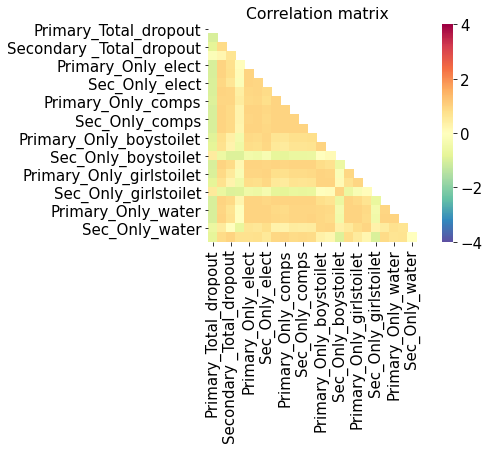

In [26]:
corr= Total.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, cmap="Spectral_r", mask=mask, square=True,vmin=-4,vmax=4)
plt.title("Correlation matrix")

In [27]:
all_cols = Total.columns.to_list()
all_cols[2:]

['Primary_Total_dropout',
 'Upper Primary_Total_dropout',
 'Secondary _Total_dropout',
 'HrSecondary_Total_dropout',
 'Primary_Only_elect',
 'U_Primary_Only_elect',
 'Sec_Only_elect',
 'HrSec_Only_elect',
 'Primary_Only_comps',
 'U_Primary_Only_comps',
 'Sec_Only_comps',
 'HrSec_Only_comps',
 'Primary_Only_boystoilet',
 'U_Primary_Only_boystoilet',
 'Sec_Only_boystoilet',
 'HrSec_Only_boystoilet',
 'Primary_Only_girlstoilet',
 'U_Primary_Only_girlstoilet',
 'Sec_Only_girlstoilet',
 'HrSec_Only_girlstoilet',
 'Primary_Only_water',
 'U_Primary_Only_water',
 'Sec_Only_water',
 'HrSec_Only_water']

## Are lack of any of the facilities a cause of dropout in the various school levels?

In [33]:
#Primary School Dropout is affected by

Primarytotal = Total.drop(columns=[ 'Upper Primary_Total_dropout', 'Secondary _Total_dropout', 'HrSecondary_Total_dropout',
  'U_Primary_Only_elect',  'Sec_Only_elect',  'HrSec_Only_elect', 
 'U_Primary_Only_comps', 'Sec_Only_comps', 'HrSec_Only_comps', 'U_Primary_Only_boystoilet',
 'Sec_Only_boystoilet', 'HrSec_Only_boystoilet', 'U_Primary_Only_girlstoilet',
 'Sec_Only_girlstoilet', 'HrSec_Only_girlstoilet', 'U_Primary_Only_water',
 'Sec_Only_water', 'HrSec_Only_water'])

primarydrop = Primarytotal.corrwith(Total.Primary_Total_dropout)

primarydrop = pd.DataFrame(primarydrop, columns=['Correlation'])
primarydrop.dropna(inplace=True)
primarydrop[primarydrop["Correlation"]<-0.8].sort_values("Correlation",ascending=False)

,Correlation
Primary_Only_boystoilet,-0.863417
Primary_Only_comps,-0.934400
Primary_Only_girlstoilet,-0.940036
Primary_Only_water,-0.986391
Primary_Only_elect,-0.996672


A lack in computers, toilet facilaties, water and electricity supply can cause students to dropout in primary school

In [32]:
#Upper Primary School Dropout is affected by 

Uprimarytotal = Total.drop(columns=[ 'Primary_Total_dropout', 'Secondary _Total_dropout', 'HrSecondary_Total_dropout',
 'Primary_Only_elect', 'Sec_Only_elect', 'HrSec_Only_elect','Primary_Only_comps', 'Sec_Only_comps', 'HrSec_Only_comps',
'Primary_Only_boystoilet', 'Sec_Only_boystoilet', 'HrSec_Only_boystoilet', 'Primary_Only_girlstoilet',
'Sec_Only_girlstoilet', 'HrSec_Only_girlstoilet', 'Primary_Only_water', 'Sec_Only_water', 'HrSec_Only_water'])


uprimarydrop = Uprimarytotal.corrwith(Total["Upper Primary_Total_dropout"])

uprimarydrop = pd.DataFrame(uprimarydrop, columns=['Correlation'])
uprimarydrop.dropna(inplace=True)
uprimarydrop[uprimarydrop["Correlation"]< -0.8].sort_values("Correlation",ascending=False)

,Correlation


None of our facilites impacts dropout rates in Upper primary

In [34]:
#Secondary School Dropout is affected by 

Secondarytotal = Total.drop(columns=[ 'Primary_Total_dropout', 'Upper Primary_Total_dropout', 'HrSecondary_Total_dropout',
 'Primary_Only_elect', 'U_Primary_Only_elect', 'HrSec_Only_elect', 'Primary_Only_comps', 'U_Primary_Only_comps',
 'HrSec_Only_comps', 'Primary_Only_boystoilet', 'U_Primary_Only_boystoilet',  'HrSec_Only_boystoilet',
 'Primary_Only_girlstoilet', 'U_Primary_Only_girlstoilet', 'HrSec_Only_girlstoilet', 'Primary_Only_water',
 'U_Primary_Only_water', 'HrSec_Only_water'])


Secondarydrop = Secondarytotal.corrwith(Total["Secondary _Total_dropout"])

Secondarydrop = pd.DataFrame(Secondarydrop, columns=['Correlation'])
Secondarydrop.dropna(inplace=True)
Secondarydrop[Secondarydrop["Correlation"]<-0.8].sort_values("Correlation",ascending=False)

,Correlation
Sec_Only_boystoilet,-0.911742
Sec_Only_girlstoilet,-0.936331


Toilet facilites seems to play a role in the dropout rate in the secondary school

In [37]:
# Higher-Secondary School Dropout is affected by 

Hrsecondarytotal = Total.drop(columns=[ 'Primary_Total_dropout', 'Upper Primary_Total_dropout', 'Secondary _Total_dropout',
 'Primary_Only_elect', 'U_Primary_Only_elect', 'Sec_Only_elect', 'Primary_Only_comps', 'U_Primary_Only_comps',
 'Sec_Only_comps', 'Primary_Only_boystoilet', 'U_Primary_Only_boystoilet', 'Sec_Only_boystoilet',
 'Primary_Only_girlstoilet', 'U_Primary_Only_girlstoilet', 'Sec_Only_girlstoilet', 'Primary_Only_water',
 'U_Primary_Only_water', 'Sec_Only_water'])    
    
Hrsecondarydrop = Hrsecondarytotal.corrwith(Total.HrSecondary_Total_dropout)

Hrsecondarydrop = pd.DataFrame(Hrsecondarydrop, columns=['Correlation'])
Hrsecondarydrop.dropna(inplace=True)
Hrsecondarydrop[Hrsecondarydrop["Correlation"]<-0.8].sort_values("Correlation",ascending=False)

,Correlation


None of our facilites impacts dropout rates in Higher Secondary Schools

# Summary

- **Primary School** A drop in the our computers and toilet facilities, water and electricity supply can cause students.

- None of our facilites seems to be influnced by dropout in both the **upper primary schools** and **higher secondary schools**.

- However a drop in our Toilet facilites would result in higher dropout rates in the **secondary school**.